In [375]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import re
import os

In [376]:
# Папка с тестами
tests_dir = 'ICC2'

# Функция для поиска всех строк в файле
def find_lines_in_file(file_path, search_string):
    matching_lines = []  # Список для хранения строк, которые содержат искомую подстроку
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            if search_string in line:
                matching_lines.append(line.strip())  # Добавляем строку в список
    return matching_lines  # Возвращаем все найденные строки

# Функция для обработки всех файлов в директориях с фильтрацией по имени
def process_tests(tests_dir, search_string, filename_pattern):
    results = []  # Список для хранения результатов
    # Проходим по всем папкам и файлам в папке tests
    for root, dirs, files in os.walk(tests_dir):
        for file in files:
            # Фильтруем файлы по паттерну в имени файла
            if filename_pattern in file:
                file_path = os.path.join(root, file)
                matching_lines = find_lines_in_file(file_path, search_string)
                if matching_lines:
                    # Добавляем результат как массив с путем и найденными строками
                    results.append([file_path, np.array(matching_lines)])
    # Преобразуем в массив NumPy
    return np.array(results, dtype=object)
        
def get_test_parameter (results):
    num = results[:,0].copy()
    for i in range(len(results[:,0])):
        pattern = r'test_(\d+\.\d+)_(\d+\.\d+)'
        match = re.search(pattern, results[i,0])
        trash = match.group(1)
        num[i] = match.group(2)
    return num

def get_test_res_nums (results):
    nums = results[:,1].copy()
    for i in range(len(results[:,0])):
        # print(nums[i])
        for j in range(len(nums[i])):
            pattern = r'-?\d+\.\d+'
            match = re.search(pattern, nums[i][j])
            # print(match)
            nums[i][j] = (match.group(0))
            nums[i][j].astype(float)
    return nums
        
def get_data(file_search):
    search_string = 'slack'
    filename_pattern = file_search

    results = process_tests(tests_dir, search_string, filename_pattern)
    results[:,0] = get_test_parameter(results)
    results[:,1] = get_test_res_nums(results)

    result = []

    for row in results:
        first_value = float(row[0])
        array_values = row[1].astype(float)
        result.append([first_value, array_values])
    result_array = np.array(result, dtype=object)
    return result_array

img2 = get_data("img2_jtag_tap_wrap.mapped.timing.rpt")
auto_max = get_data("route_auto.report_timing.max")
auto_min = get_data("route_auto.report_timing.min")
opt_max = get_data("route_opt.report_timing.max")
opt_min = get_data("route_opt.report_timing.min")

In [377]:
def show_graphs(data, ss, cc, title, g_size = 4):
    special_x = 0.639
    special_y = 0
    
    ii = len(ss)
    jj = len(cc)
    d_size = len(data)
    
    x = []
    for i in range(d_size):
        x.append(data[i][0])
    
    fig, axs = plt.subplots(ii, jj, figsize=(ii * g_size, jj * g_size))
    
    for i in range(ii):
        axs[i, 0].set_ylabel(ss[i])
        
    for j in range(jj):
        axs[0, j].set_title(cc[j])
    
    fig.suptitle(title, fontsize=16)
    for i in range(ii):
        for j in range(jj):
            y_t = np.empty((0, 2))
            y_f = np.empty((0, 2))
            for k in range(d_size):
                point = data[k][1][i * jj + j]
                if point >= 0:
                    y_t = np.vstack([y_t, [x[k],point]])
                else:
                    y_f = np.vstack([y_f, [x[k],point]])
                if (x[k] == special_x):
                    special_y = point
            # print(y_t)
            axs[i, j].plot(y_t[:,0], y_t[:,1], "g.")
            axs[i, j].plot(y_f[:,0], y_f[:,1], "r.")
            axs[i, j].plot(special_x, special_y, "o", color="none", markersize=10, markeredgewidth=1, markeredgecolor="black")
            axs[i, j].grid()
    plt.savefig(title+".png", dpi=300)
            
def show_graphs_string(data, ss, cc, names, title, g_size = 4):
    special_x = 0.639
    special_y = 0
    
    ii = ss
    jj = cc
    d_size = len(data)
    
    x = []
    for i in range(d_size):
        x.append(data[i][0])
    
    fig, axs = plt.subplots(ii, jj, figsize=(ii * g_size, jj * g_size))
    
    fig.suptitle(title, fontsize=16)
    for i in range(ii):
        for j in range(jj):
            y_t = np.empty((0, 2))
            y_f = np.empty((0, 2))
            for k in range(d_size):
                point = data[k][1][i * jj + j]
                if point >= 0:
                    y_t = np.vstack([y_t, [x[k],point]])
                else:
                    y_f = np.vstack([y_f, [x[k],point]])
                if (x[k] == special_x):
                    special_y = point
            # print(y_t)
            axs[i, j].plot(y_t[:,0], y_t[:,1], "g.")
            axs[i, j].plot(y_f[:,0], y_f[:,1], "r.")
            axs[i, j].plot(special_x, special_y, "o", color="none", markersize=10, markeredgewidth=1, markeredgecolor="black")
            axs[i, j].set_title(names[i * jj + j])
            axs[i, j].grid()
    plt.savefig(title+".png", dpi=300)

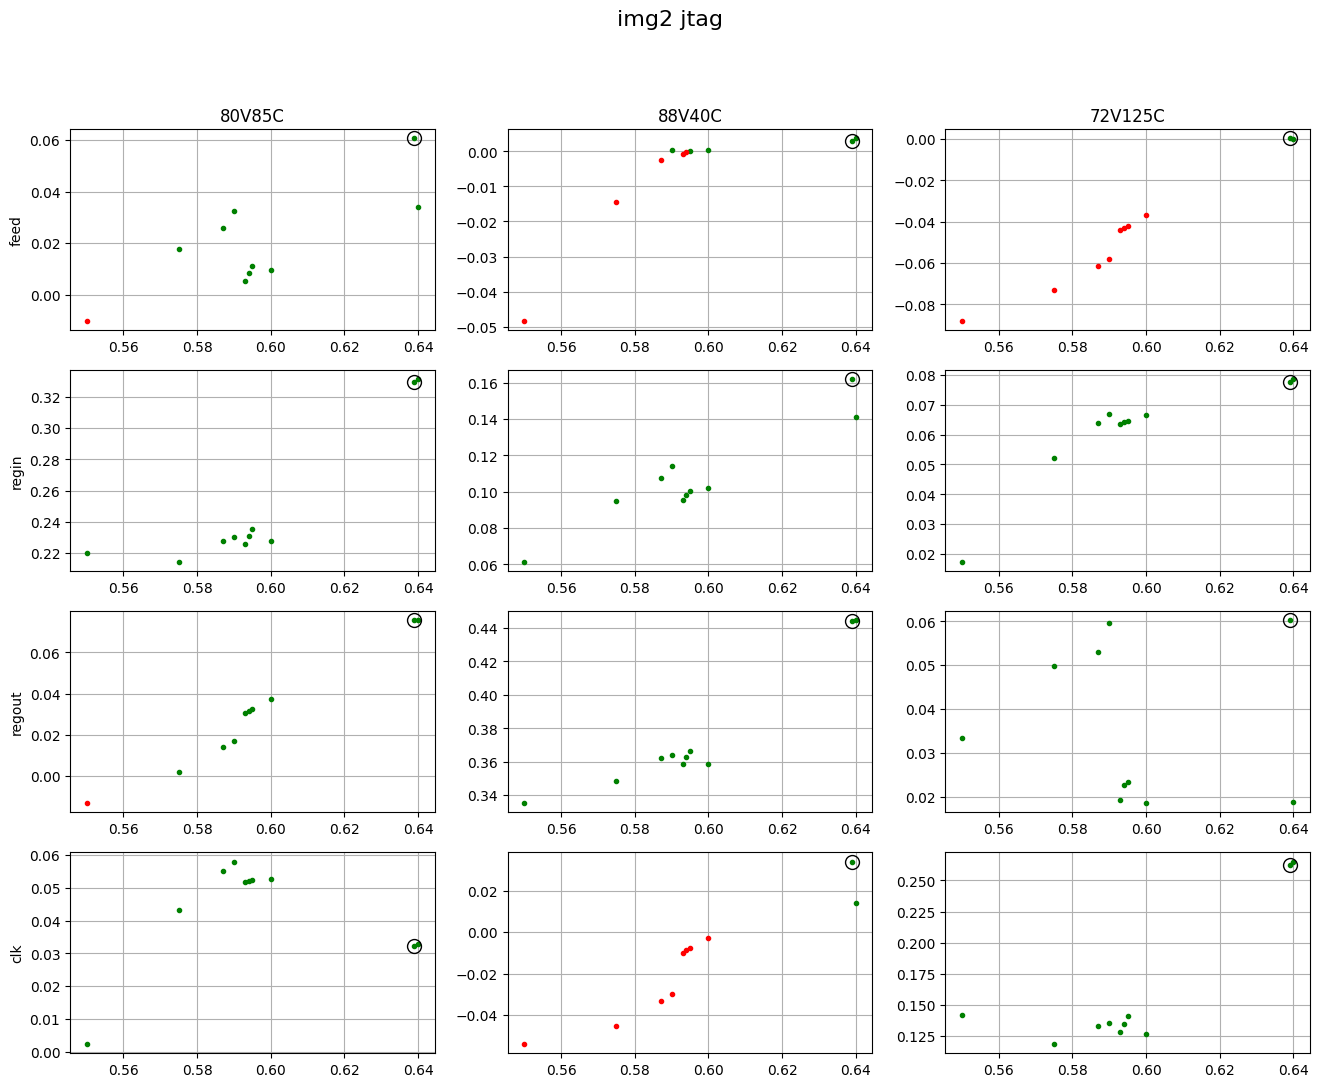

In [378]:
ss = ["feed","regin","regout","clk"]
cc = ["80V85C","88V40C","72V125C"]
show_graphs(img2[1:-2], ss, cc, "img2 jtag")

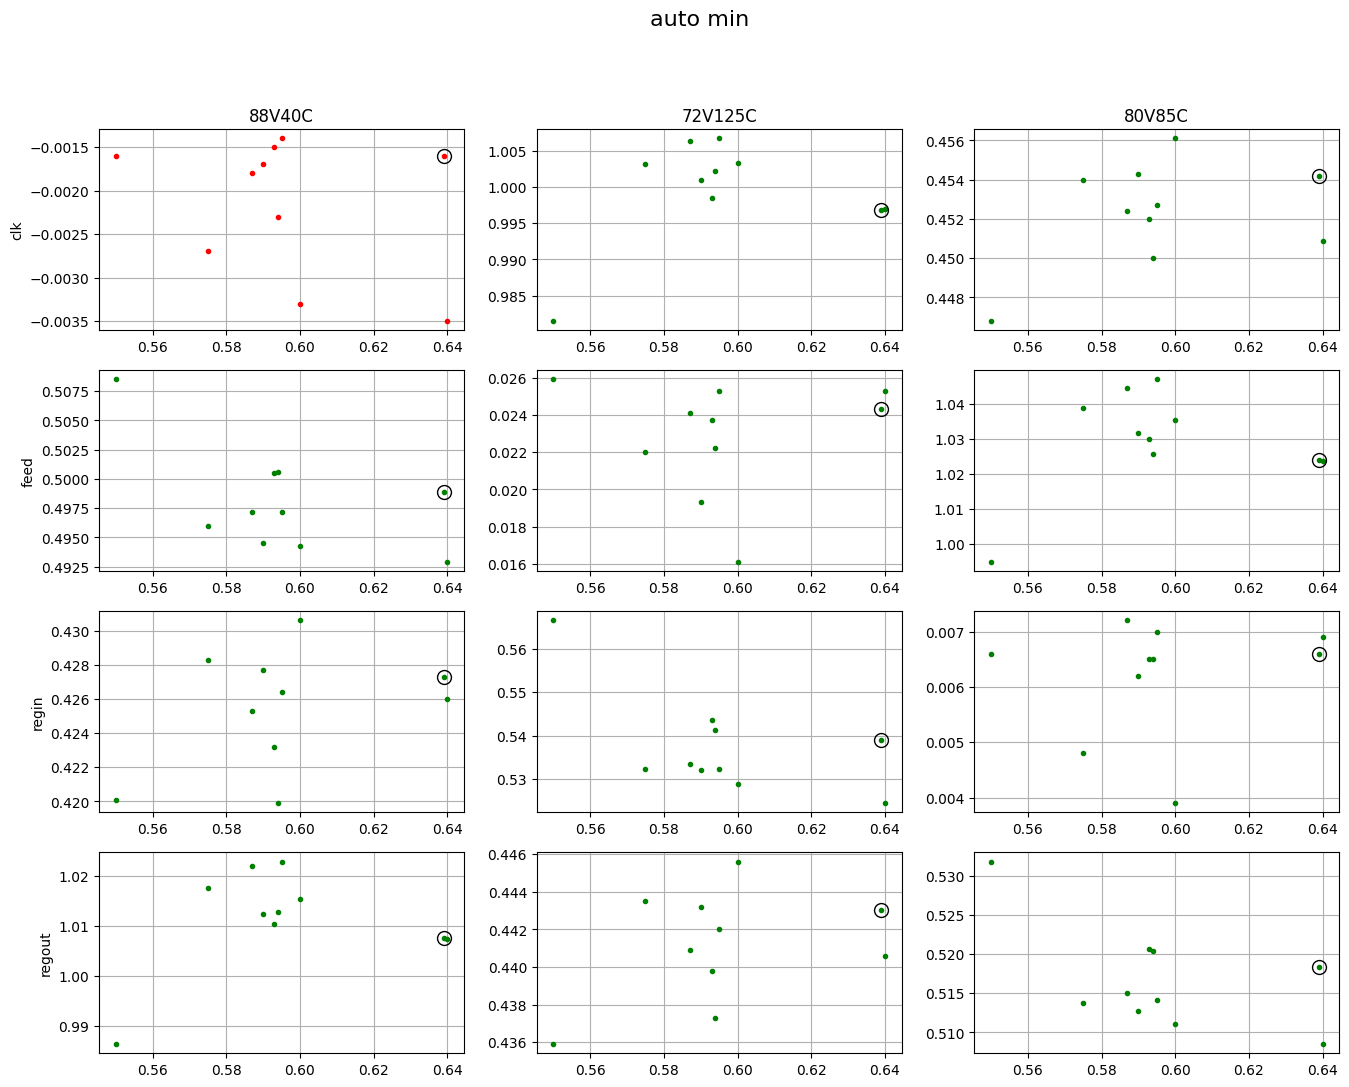

In [379]:
ss = ["clk","feed","regin","regout"]
cc = ["88V40C","72V125C","80V85C"]
show_graphs(auto_min[1:-2], ss, cc, "auto min")

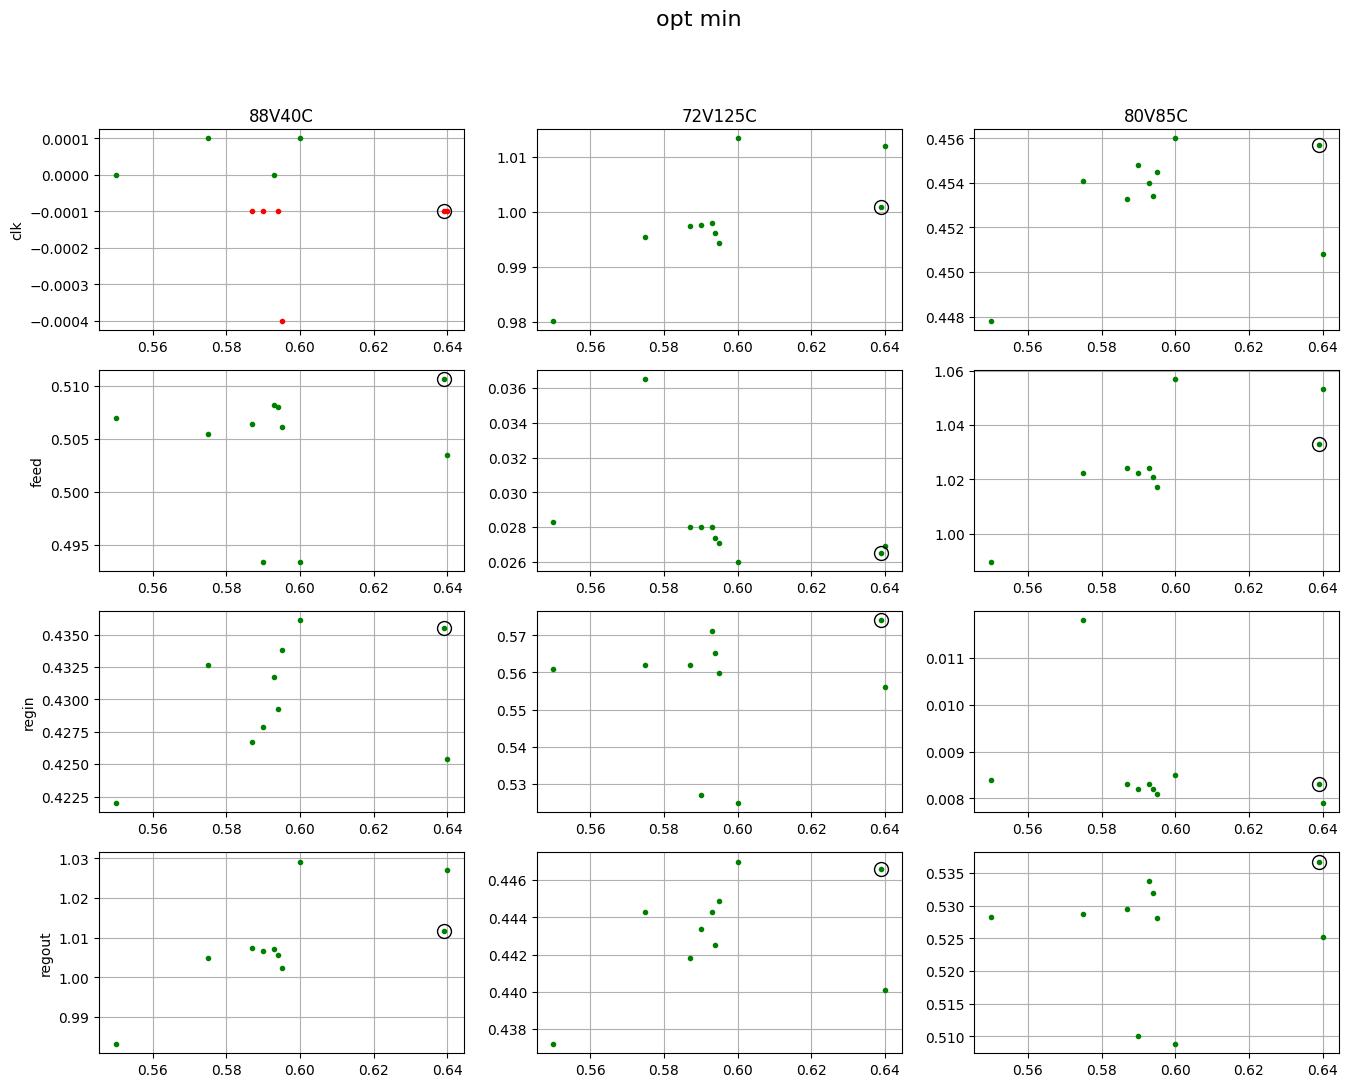

In [380]:
ss = ["clk","feed","regin","regout"]
cc = ["88V40C","72V125C","80V85C"]
show_graphs(opt_min[1:-2], ss, cc, "opt min")

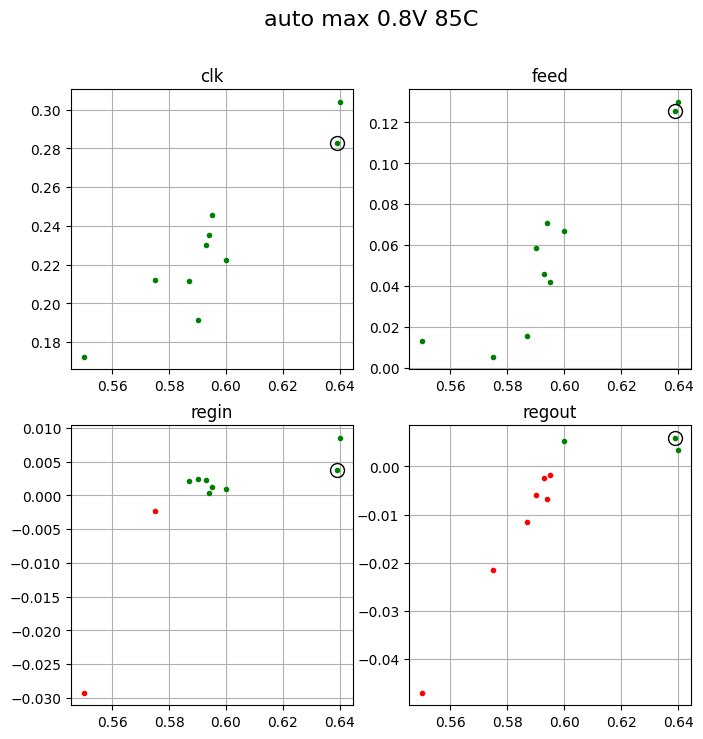

In [381]:
names = ["clk","feed","regin","regout"]
show_graphs_string(auto_max[1:-2], 2, 2, names, "auto max 0.8V 85C")

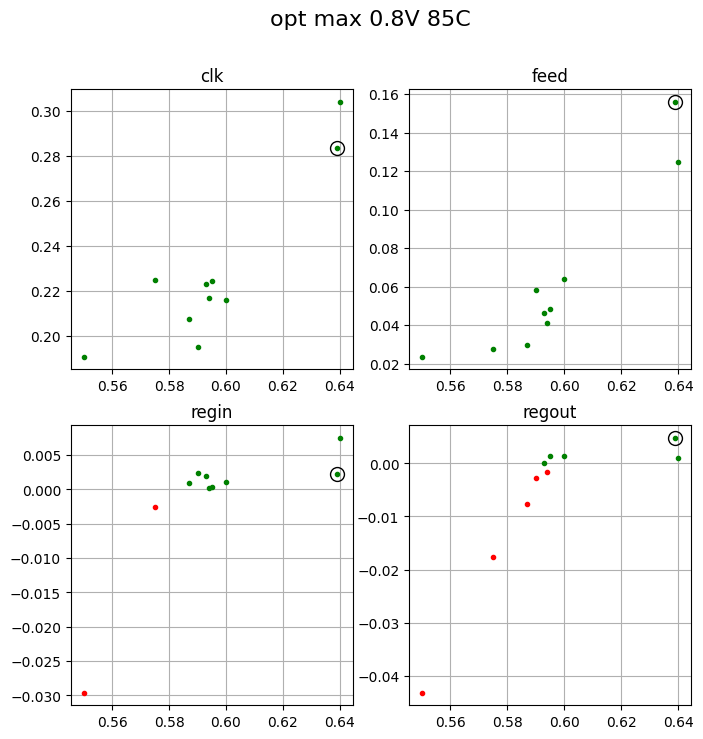

In [382]:
names = ["clk","feed","regin","regout"]
show_graphs_string(opt_max[1:-2], 2, 2, names, "opt max 0.8V 85C")